For this project we will attempt to use KMeans Clustering to cluster Universities into to two groups, Private and Public.


## Import Libraries

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

#models 
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer, silhouette_visualizer
from sklearn.metrics import silhouette_score 
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

## Get the Data

**Read in the Data file. Figure out how to set the first column as the index.**

In [3]:
df=pd.read_csv('D:/Route AI & ML/Datasets/Kmeans_assignment_data.csv')

**Check the head of the data**

In [4]:
df.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15



## Data Description

* **Private A factor with levels No and Yes indicating private or public university**
* Apps Number of applications received
* Accept Number of applications accepted
* Enroll Number of new students enrolled
* Top10perc Pct. new students from top 10% of H.S. class
* Top25perc Pct. new students from top 25% of H.S. class
* F.Undergrad Number of fulltime undergraduates
* P.Undergrad Number of parttime undergraduates
* Outstate Out-of-state tuition
* Room.Board Room and board costs
* Books Estimated book costs
* Personal Estimated personal spending
* PhD Pct. of faculty with Ph.D.’s
* Terminal Pct. of faculty with terminal degree
* S.F.Ratio Student/faculty ratio
* perc.alumni Pct. alumni who donate
* Expend Instructional expenditure per student
* Grad.Rate Graduation rate

**Get the data info**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   777 non-null    object 
 1   Private      777 non-null    object 
 2   Apps         777 non-null    int64  
 3   Accept       777 non-null    int64  
 4   Enroll       777 non-null    int64  
 5   Top10perc    777 non-null    int64  
 6   Top25perc    777 non-null    int64  
 7   F.Undergrad  777 non-null    int64  
 8   P.Undergrad  777 non-null    int64  
 9   Outstate     777 non-null    int64  
 10  Room.Board   777 non-null    int64  
 11  Books        777 non-null    int64  
 12  Personal     777 non-null    int64  
 13  PhD          777 non-null    int64  
 14  Terminal     777 non-null    int64  
 15  S.F.Ratio    777 non-null    float64
 16  perc.alumni  777 non-null    int64  
 17  Expend       777 non-null    int64  
 18  Grad.Rate    777 non-null    int64  
dtypes: float

**Get the data description**

In [6]:
df.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


## EDA

**Create a scatterplot of Grad.Rate versus Room Board
the points are colored by the Private column**

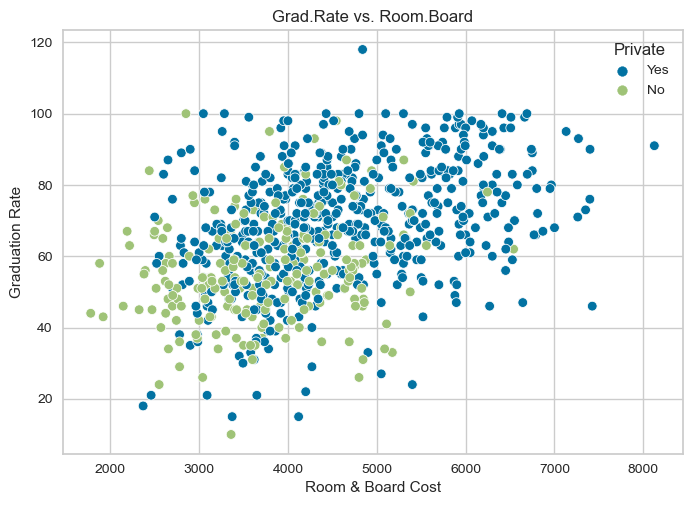

In [7]:
sns.scatterplot(x='Room.Board', y='Grad.Rate', hue='Private', data=df)
plt.title('Grad.Rate vs. Room.Board')
plt.xlabel('Room & Board Cost')
plt.ylabel('Graduation Rate')
plt.legend(title='Private')
plt.grid(True)
plt.show()

**Create a scatterplot of F.Undergrad versus Outstate
where the points are colored by the Private column.**

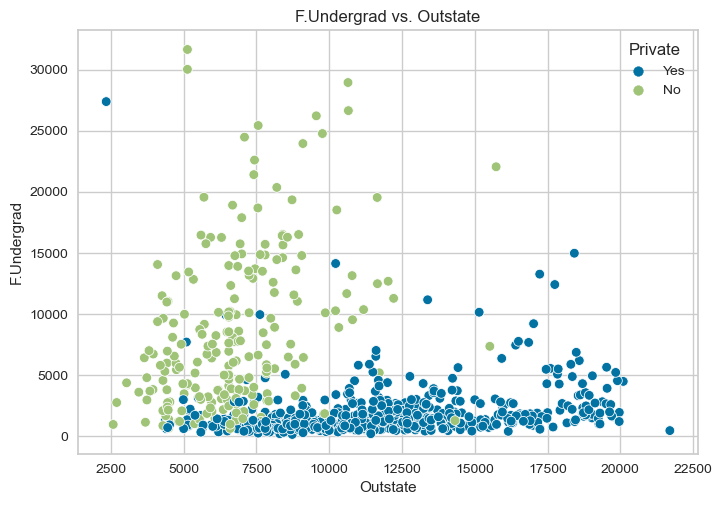

In [8]:
sns.scatterplot(x='Outstate', y='F.Undergrad', hue='Private', data=df)
plt.title('F.Undergrad vs. Outstate')
plt.xlabel('Outstate')
plt.ylabel('F.Undergrad')
plt.legend(title='Private')
plt.grid(True)
plt.show()

**Create a stacked histogram showing Out of State Tuition based on the Private column. Try doing this using [sns.FacetGrid](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.FacetGrid.html).
If that is too tricky, see if you can do it just by using two instances of pandas.plot(kind='hist').**

In [9]:
df.set_index('Unnamed: 0').columns

Index(['Private', 'Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc',
       'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books',
       'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend',
       'Grad.Rate'],
      dtype='object')

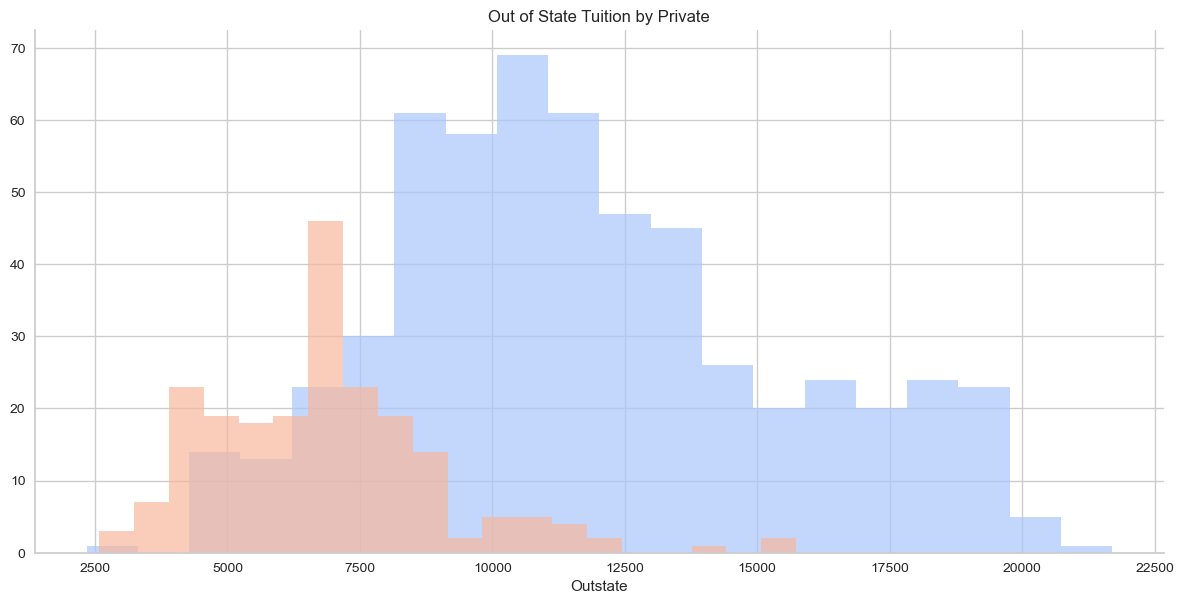

In [10]:
g = sns.FacetGrid(df, hue="Private", palette='coolwarm', height=6, aspect=2)
g = g.map(plt.hist, 'Outstate', bins=20, alpha=0.7)
plt.title('Out of State Tuition by Private')
plt.show()

**Create a similar histogram for the Grad.Rate column.**

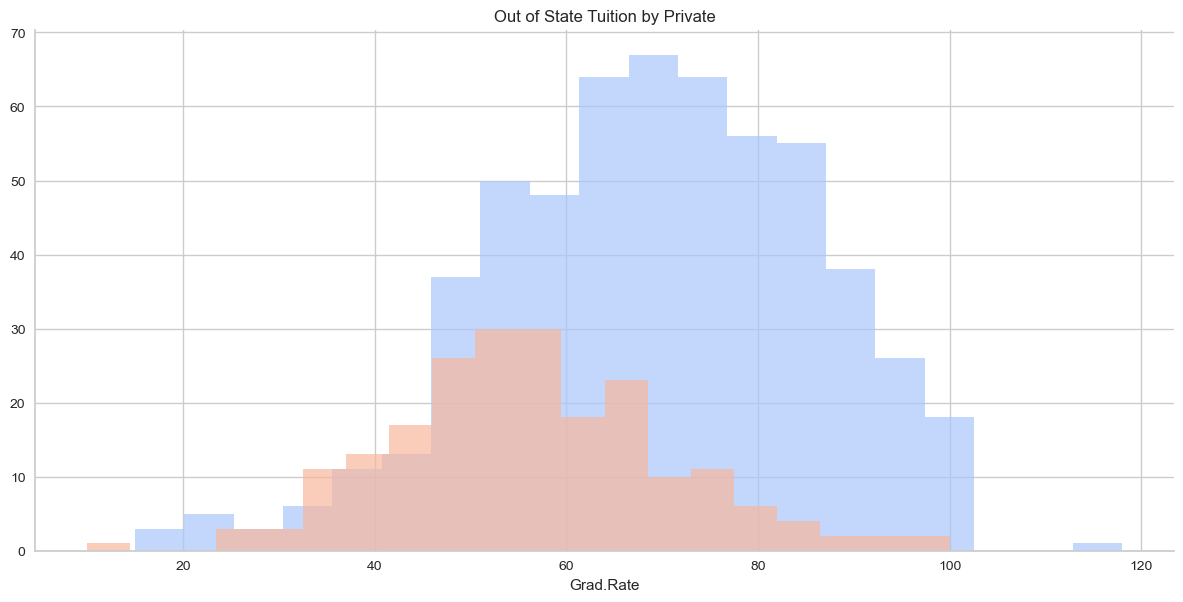

In [11]:
g = sns.FacetGrid(df, hue="Private", palette='coolwarm', height=6, aspect=2)
g = g.map(plt.hist, 'Grad.Rate', bins=20, alpha=0.7)
plt.title('Out of State Tuition by Private')
plt.show()

**Notice how there seems to be a private school with a graduation rate of higher than 100%.What is the name of that school?**

In [12]:
school_name = df[(df['Private'] == 'Yes') & (df['Grad.Rate'] > 100)]
school_name

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
95,Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


**Set that school's graduation rate to 100 so it makes sense. You may get a warning not an error) when doing this operation, so use dataframe operations or just re-do the histogram visualization to make sure it actually went through.**

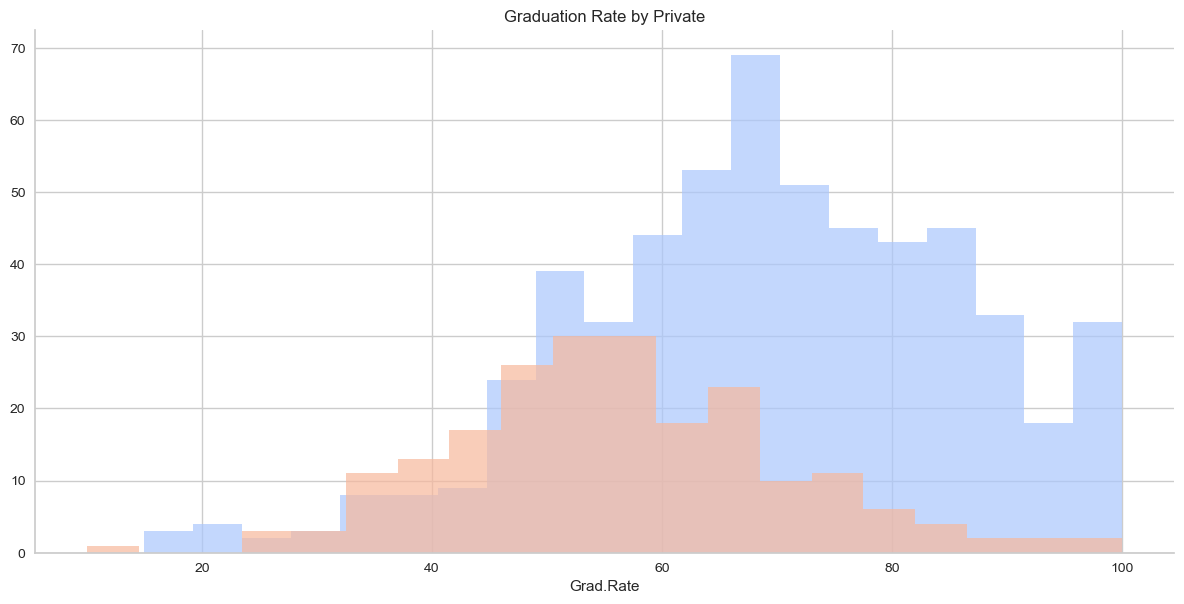

In [13]:
index = df[df['Grad.Rate'] > 100].index
df.loc[index, 'Grad.Rate'] = 100
df.loc[index]
g = sns.FacetGrid(df, hue="Private", palette='coolwarm', height=6, aspect=2)
g = g.map(plt.hist, 'Grad.Rate', bins=20, alpha=0.7)
plt.title('Graduation Rate by Private')
plt.show()

In [14]:
df['Grad.Rate'].replace(118,100,inplace=True)

In [15]:
df.drop(['Unnamed: 0'],axis=1 , inplace=True )

In [16]:
school_name = df[(df['Private'] == 'Yes') & (df['Grad.Rate'] > 100)]
school_name

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate


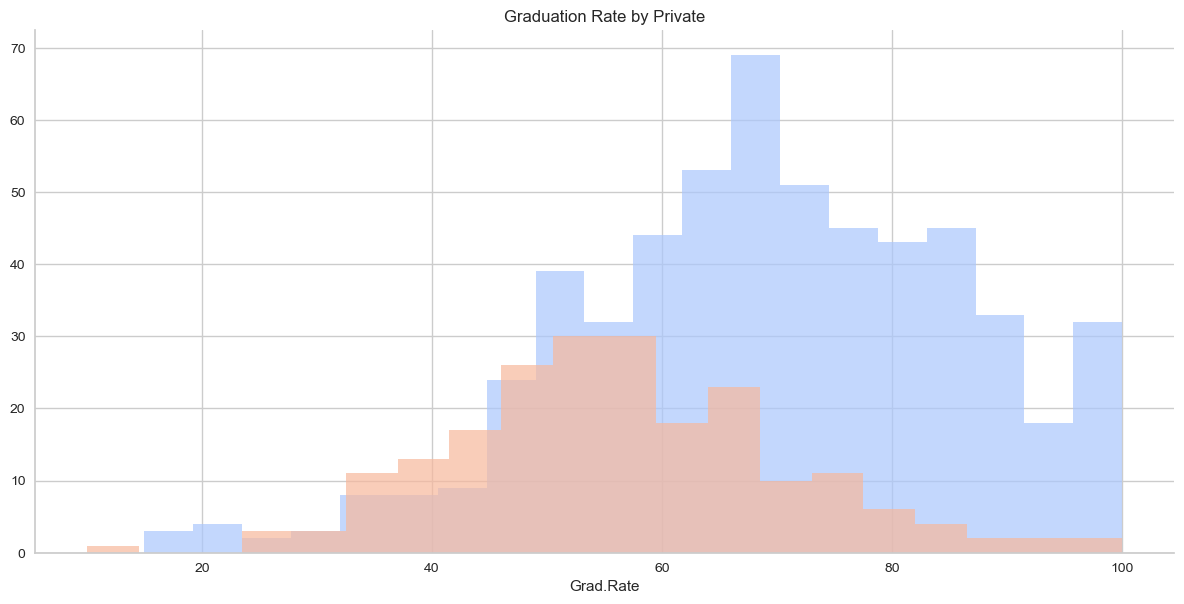

In [17]:
index = df[df['Grad.Rate'] > 100].index
df.loc[index, 'Grad.Rate'] = 100
df.loc[index]
g = sns.FacetGrid(df, hue="Private", palette='coolwarm', height=6, aspect=2)
g = g.map(plt.hist, 'Grad.Rate', bins=20, alpha=0.7)
plt.title('Graduation Rate by Private')
plt.show()

-------

## K Means Clustering

**Apply Elbow Method to determine the best number of clusters**

**Also show me a graph of the elbow method**

In [18]:
map_for_Private={'Yes':1,'No':2}
df.Private=df.Private.map(map_for_Private)
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,1,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,1,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,1,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,1,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [20]:
scores_list = []
k_range = range(1,10)
for k in k_range:
    kmeans_model = KMeans(n_clusters = k, random_state = 42)
    kmeans_model.fit(df)
    scores_list.append(kmeans_model.inertia_)

Text(0, 0.5, 'Sum of Squared Error')

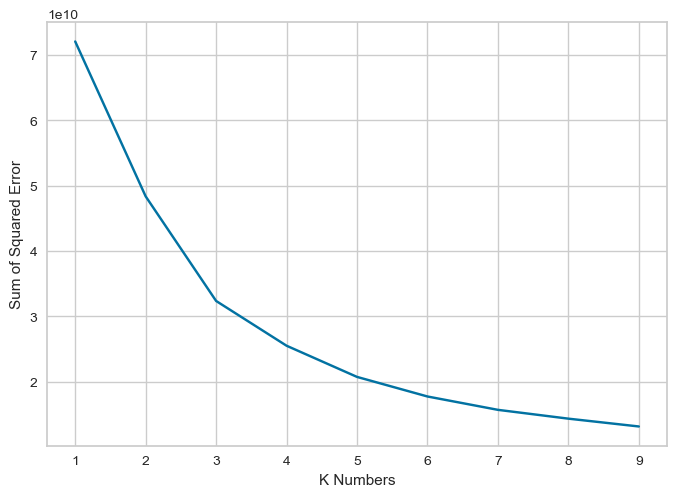

In [21]:
plt.plot(k_range, scores_list)
plt.xlabel('K Numbers')
plt.ylabel('Sum of Squared Error')

**Also show the silhoutte score**

In [22]:
scores = []
sillouette_scores = []
k_range = range(2,10)
for k in k_range:
    kmeans_model = KMeans(n_clusters = k, random_state = 42)
    y_pred = kmeans_model.fit_predict(df)
    scores.append(kmeans_model.inertia_)
    sillouette_scores.append(silhouette_score(df, y_pred))
    print("K = ", k, " : ",  kmeans_model.inertia_)
    print("Silhoutte Score : %0.4f" % silhouette_score(df, y_pred))

K =  2  :  48356200817.1427
Silhoutte Score : 0.5599
K =  3  :  32365873046.54272
Silhoutte Score : 0.4759
K =  4  :  25520848678.74464
Silhoutte Score : 0.3805
K =  5  :  20753270968.627262
Silhoutte Score : 0.3945
K =  6  :  17759716540.54819
Silhoutte Score : 0.3079
K =  7  :  15717446598.072712
Silhoutte Score : 0.3066
K =  8  :  14369882759.724491
Silhoutte Score : 0.3065
K =  9  :  13175492902.107689
Silhoutte Score : 0.3096


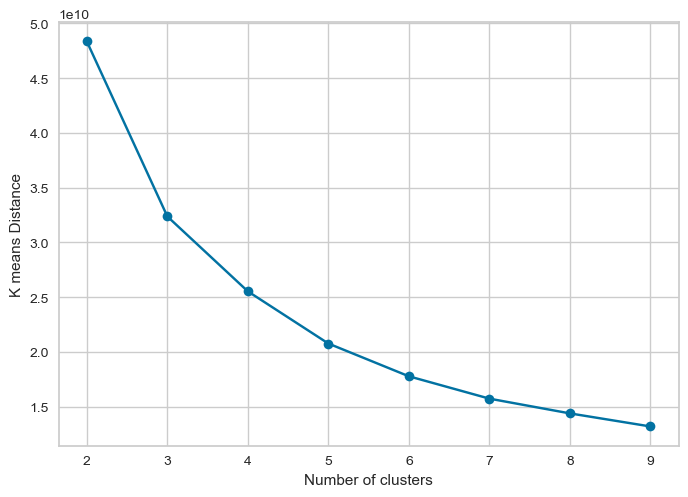

In [24]:
plt.plot(k_range, scores, marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel("K means Distance")
plt.show()

**Fit the KMeans model with the best number of clusters**

In [25]:
kmeans_model = KMeans(n_clusters = 3, random_state = 42)
kmeans_model.fit(df)
y_pred = kmeans_model.predict(df)
y_pred

array([0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 1, 0, 0, 0, 0,
       2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 0, 2, 0,
       0, 0, 0, 1, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 2, 2,
       0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 2, 2, 0, 2, 1, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 2, 2, 1, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0,
       0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2,
       1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 2,
       0, 2, 1, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 2, 0,
       0, 2, 1, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0,

**print the clusters center**

In [26]:
kmeans_model.cluster_centers_

array([[1.23893805e+00, 1.70182301e+03, 1.23653451e+03, 4.91520354e+02,
        2.18194690e+01, 4.97769912e+01, 2.22618053e+03, 6.56030088e+02,
        9.28193982e+03, 4.14370619e+03, 5.37015929e+02, 1.32979646e+03,
        6.75787611e+01, 7.51433628e+01, 1.46362832e+01, 2.09274336e+01,
        7.83074690e+03, 6.27752212e+01],
       [1.91566265e+00, 1.06216145e+04, 7.30063855e+03, 2.93942169e+03,
        3.20000000e+01, 6.34698795e+01, 1.54825060e+04, 3.17455422e+03,
        8.23585542e+03, 4.13487952e+03, 5.94349398e+02, 1.88833735e+03,
        8.41566265e+01, 8.95542169e+01, 1.64072289e+01, 1.58072289e+01,
        9.44095181e+03, 6.05060241e+01],
       [1.00775194e+00, 3.79185271e+03, 2.04663566e+03, 6.53937984e+02,
        4.98372093e+01, 7.72248062e+01, 2.57355039e+03, 2.35829457e+02,
        1.69343256e+04, 5.43727907e+03, 5.74604651e+02, 1.03575194e+03,
        8.75193798e+01, 9.33333333e+01, 1.02046512e+01, 3.51627907e+01,
        1.78138140e+04, 8.02868217e+01]])

**Print your prediction**

In [27]:
y_pred

array([0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 1, 0, 0, 0, 0,
       2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 0, 2, 0,
       0, 0, 0, 1, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 2, 2,
       0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 2, 2, 0, 2, 1, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 2, 2, 1, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0,
       0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2,
       1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 2,
       0, 2, 1, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 2, 0,
       0, 2, 1, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0,

**Provide me with one or more scatter plot showing the clusters**

In [28]:
df['Cluster'] = y_pred
df

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Cluster
0,1,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,0
1,1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,0
2,1,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,0
3,1,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,2
4,1,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,2,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40,0
773,1,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83,0
774,1,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49,0
775,1,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99,2


In [29]:
df0 = df[df.Cluster == 0]
df1 = df[df.Cluster == 1]

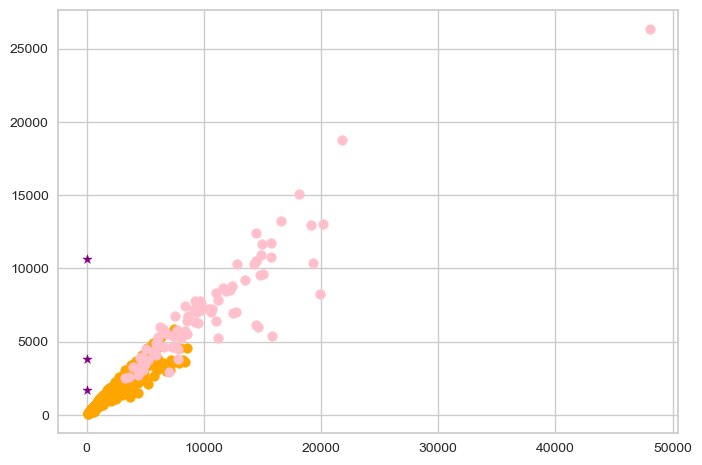

In [30]:
plt.scatter(df0.Apps, df0['Accept'], color = 'orange')
plt.scatter(df1.Apps, df1['Accept'], color = 'pink')

plt.scatter(kmeans_model.cluster_centers_[:,0], kmeans_model.cluster_centers_[:,1], color = 'purple', 
           marker = "*", label = 'centroid')

## Evaluation

There is no perfect way to evaluate clustering if you don't have the labels, however since this is just an exercise, we do have the labels, so we take advantage of this to evaluate our clusters, keep in mind, you usually won't have this luxury in the real world.

**Create a new column for df called 'Cluster', which is a 1 for a Private school, and a 0 for a public school.**

In [31]:
df['cluster']=df['Private'].apply(lambda x:1 if x== 1 else 0)

In [32]:
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Cluster,cluster
0,1,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,0,1
1,1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,0,1
2,1,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,0,1
3,1,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,2,1
4,1,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,0,1


Not so bad considering the algorithm is purely using the features to cluster the universities into 2 distinct groups! Hopefully you can begin to see how K Means is useful for clustering un-labeled data!

## Great Job!